In [ ]:
'''
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 1. 유클리드 거리 함수
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# 2. KNN 예측 함수
def knn_predict(x, X_train, y_train, k):
    distances = [euclidean_distance(x, xi) for xi in X_train] # distance list
    k_indices = np.argsort(distances)[:k] 
    k_labels = y_train[k_indices]
    
    labels, counts = np.unique(k_labels, return_counts=True)
    return labels[np.argmax(counts)] # return prediction of y

# 3. 정확도 평가 함수
def compute_accuracy(X_val, y_val, X_train, y_train, k):
    correct = 0
    for x, y in zip(X_val, y_val):
        pred = knn_predict(x, X_train, y_train, k)
        if pred == y:
            correct += 1
    return correct / len(y_val)

# 4. 데이터 불러오기 및 전처리
iris = load_iris()
X = iris.data[:130, [2, 3]]  # petal length, petal width만 사용
y = iris.target[:130]        # 130개 샘플만 사용

# 5. 훈련/검증 데이터 분할
np.random.seed(10000)
indices = np.random.permutation(len(X)) # index 섞기
split = int(0.75 * len(X))  # 약 97개 훈련, 33개 검증, split은 분할 index

train_idx = indices[:split]
val_idx = indices[split:]
# 데이터 분할

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

# 6. k값 최적화
k_candidates = range(1, 16)
best_k = None
best_acc = 0.0

print("k값별 정확도:")
for k in k_candidates:
    acc = compute_accuracy(X_val, y_val, X_train, y_train, k)
    print(f"k = {k} → 정확도: {acc:.2f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\n✅ 최적의 k값은: {best_k} (정확도: {best_acc:.2f})")
'''

k값별 정확도:
k = 1 → 정확도: 0.91
k = 2 → 정확도: 0.94
k = 3 → 정확도: 0.94
k = 4 → 정확도: 0.94
k = 5 → 정확도: 0.94
k = 6 → 정확도: 0.94
k = 7 → 정확도: 0.94
k = 8 → 정확도: 0.94
k = 9 → 정확도: 0.94
k = 10 → 정확도: 0.94
k = 11 → 정확도: 0.94
k = 12 → 정확도: 0.94
k = 13 → 정확도: 0.94
k = 14 → 정확도: 0.97
k = 15 → 정확도: 0.97

✅ 최적의 k값은: 14 (정확도: 0.97)


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 데이터 불러오기
iris = load_iris()
x = iris.data[:130]           # x값: 특성 전체 (130개 샘플)
y = iris.target[:130]         # y값: 품종 라벨 (0, 1, 2)

# 데이터프레임으로 보기 좋게 구성
df = pd.DataFrame(x, columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
df["Label"] = y

print(df)

     Sepal Length  Sepal Width  Petal Length  Petal Width  Label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
125           7.2          3.2           6.0          1.8      2
126           6.2          2.8           4.8          1.8      2
127           6.1          3.0           4.9          1.8      2
128           6.4          2.8           5.6          2.1      2
129           7.2          3.0           5.8          1.6      2

[130 rows x 5 columns]


C:\Users\gamza\AppData\Local\Temp\ipykernel_39552\2912519092.py:35: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\gamza\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


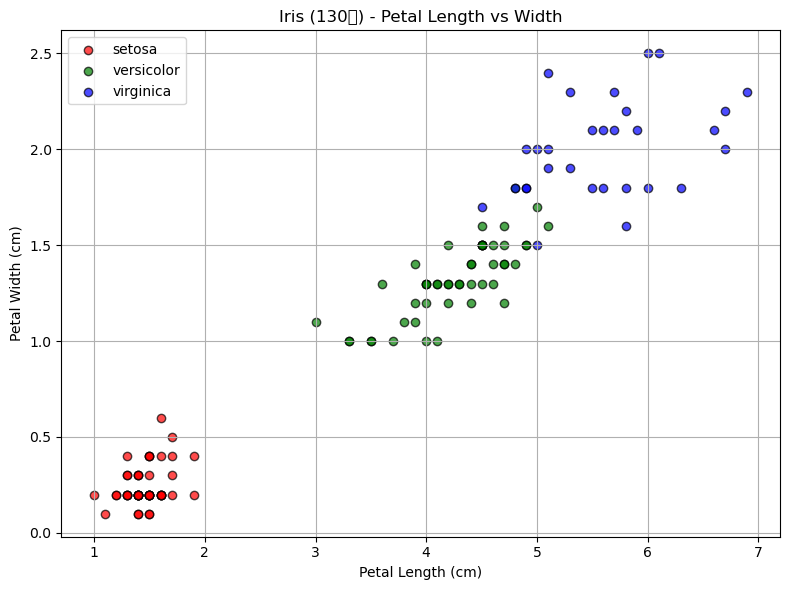

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# 데이터 준비 (꽃잎 길이, 너비만 사용)
iris = load_iris()
x = iris.data[:130, [2, 3]]  # 2: petal length, 3: petal width
y = iris.target[:130]

# DataFrame 생성
df = pd.DataFrame(x, columns=["Petal Length", "Petal Width"])
df["Label"] = y

# 시각화
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']

for i in range(3):
    subset = df[df["Label"] == i]
    plt.scatter(
        subset["Petal Length"], 
        subset["Petal Width"], 
        color=colors[i], 
        label=labels[i], 
        alpha=0.7,
        edgecolor='k'
    )

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris (130개) - Petal Length vs Width")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
